In [18]:
from google.colab import files
uploaded = files.upload()

Saving Steel_industry_data.csv to Steel_industry_data (1).csv


In [23]:
# Step 1: Load the Dataset
import pandas as pd
df = pd.read_csv('Steel_industry_data.csv')
df = pd.read_csv(list(uploaded.keys())[0])
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01-01-18 0:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01-01-18 0:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01-01-18 0:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01-01-18 1:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01-01-18 1:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [24]:
# Step 2: Preprocess the 'date' Column
# Convert the `date` column to 'datetime'
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%y %H:%M')

# Extract features from the `date` column
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df = df.drop(columns=['date'])
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,hour,day,month,year
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,0,1,1,2018
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,0,1,1,2018
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,0,1,1,2018
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,1,1,2018
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,1,1,2018


In [25]:
# Step 3: Convert Categorical Features and Handle Missing Values
df.columns = df.columns.str.strip()
print(df.columns)

# Convert categorical features to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['WeekStatus', 'Day_of_week', 'Load_Type'], drop_first=True)

# Handle missing values if there are any
df.fillna(df.mean(), inplace=True)
df.head()

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'hour', 'day', 'month',
       'year'],
      dtype='object')


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,hour,day,month,year,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,1,2018,False,True,False,False,False,False,False,False,False
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,1,2018,False,True,False,False,False,False,False,False,False
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,1,2018,False,True,False,False,False,False,False,False,False
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,1,1,2018,False,True,False,False,False,False,False,False,False
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,1,1,2018,False,True,False,False,False,False,False,False,False


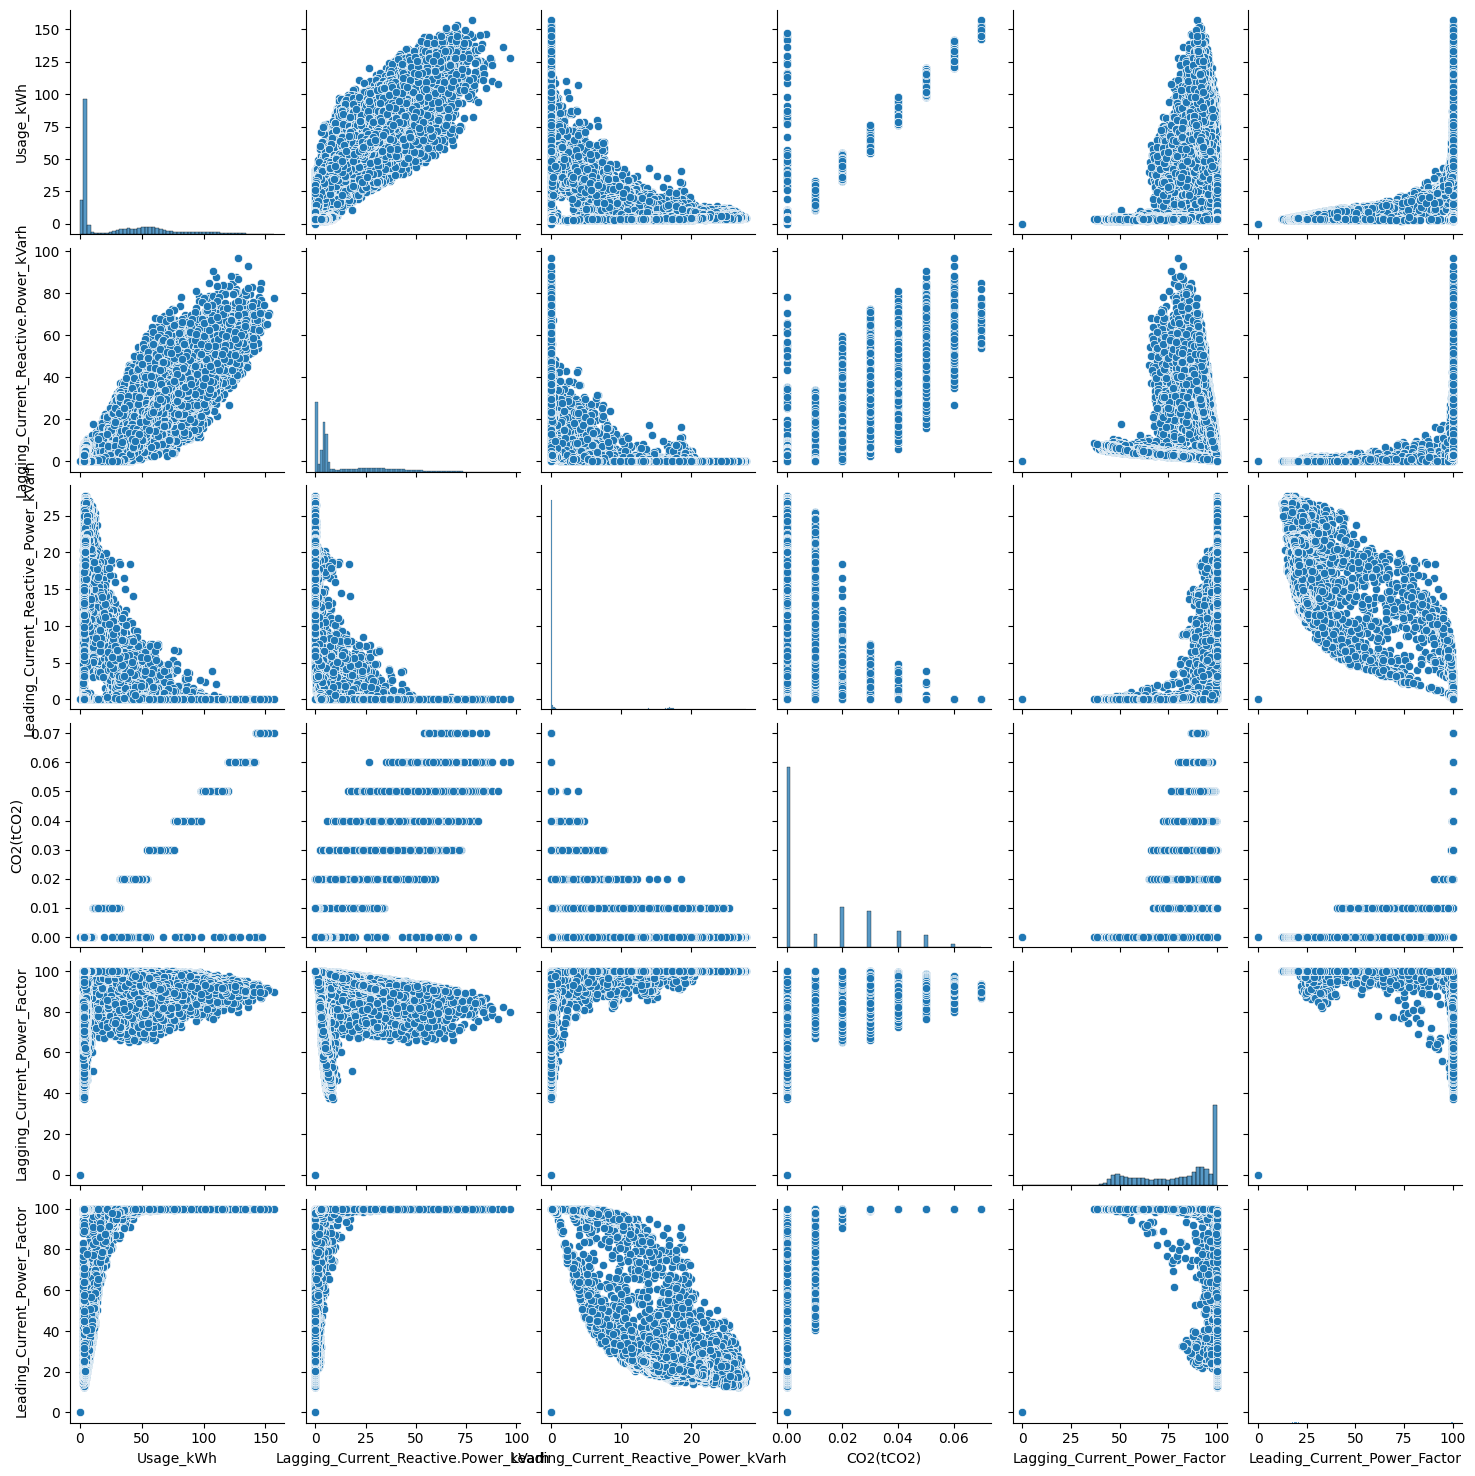

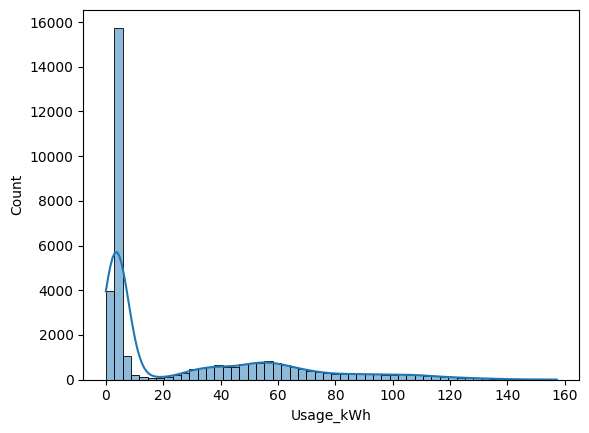

In [27]:
# Step 4: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships between numerical variables
sns.pairplot(df[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']])
plt.show()

# Distribution plot for the target variable
sns.histplot(df['Usage_kWh'], kde=True)
plt.show()

In [28]:
# Step 5: Calculate Basic Statistics
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,hour,day,month,year
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.0
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,11.500000,15.720548,6.526027,2018.0
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317,6.922285,8.796373,3.447901,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.0
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,5.750000,8.000000,4.000000,2018.0
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,11.500000,16.000000,7.000000,2018.0
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,17.250000,23.000000,10.000000,2018.0
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,23.000000,31.000000,12.000000,2018.0


In [30]:
# Step 6: Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# features and target variable
features = [
    'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor',
    'NSM', 'hour', 'day', 'month', 'year', 'WeekStatus_Weekend',
    'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
    'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
    'Load_Type_Maximum_Load', 'Load_Type_Medium_Load'
]
X = df[features]
y = df['Usage_kWh']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [31]:
# Step 7: Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 2.5968743509098258
Mean Squared Error: 17.810733633662558
R-squared: 0.9843315002781476
